In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.datasets import fashion_mnist
from keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2


from keras_tuner.tuners import RandomSearch , Hyperband
from keras_tuner import HyperModel
from sklearn.metrics import confusion_matrix


from keras.utils import to_categorical, plot_model



# Q1

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
classes = np.unique(y_train)

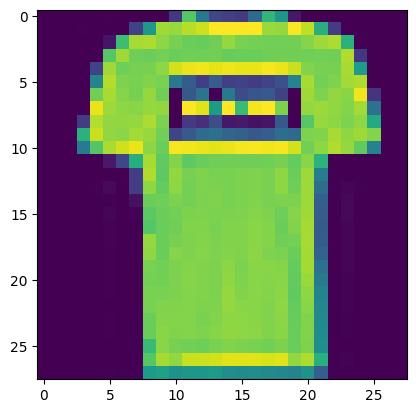

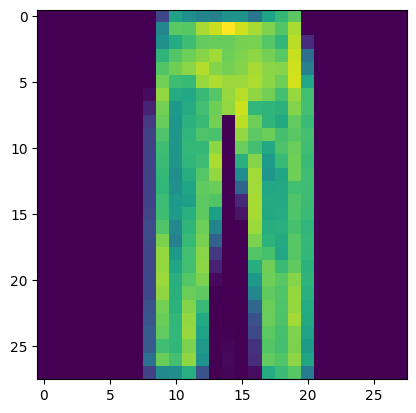

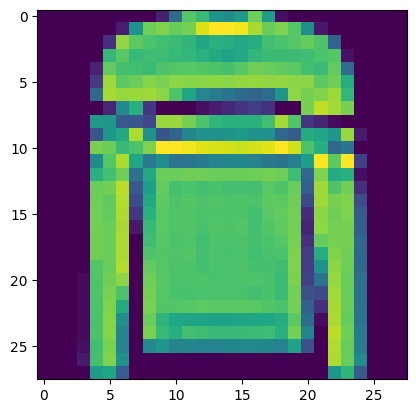

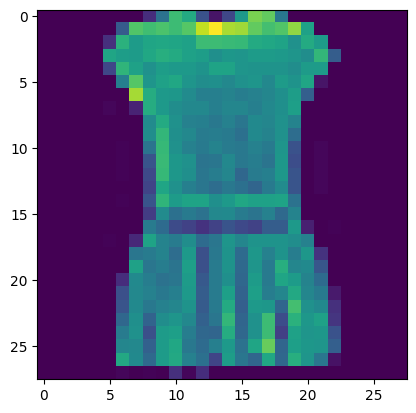

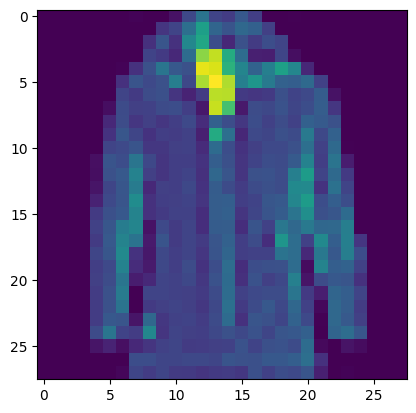

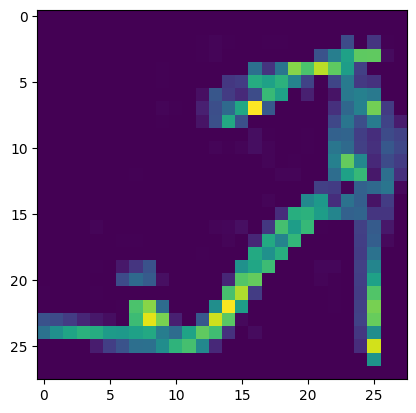

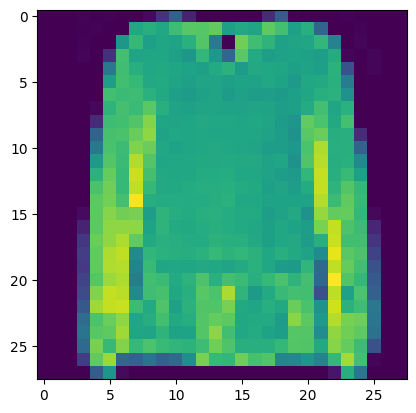

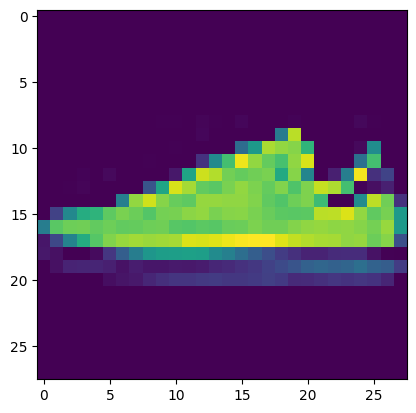

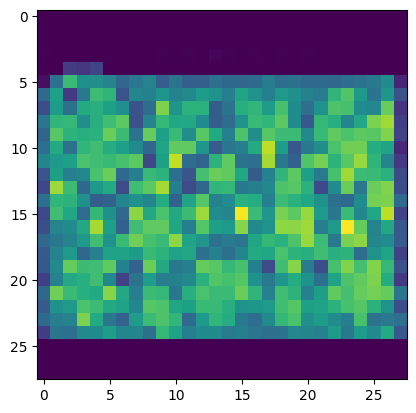

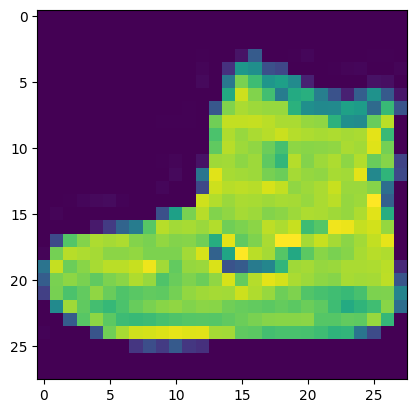

In [6]:
for i in classes:
    index = np.where(y_train == i)[0][0]
    plt.imshow(X_train[index])
    plt.show()

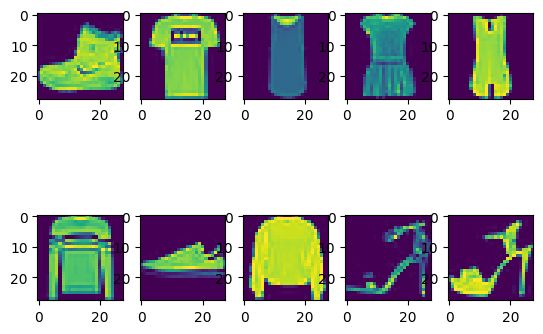

In [7]:
fig, ax = plt.subplots(2,5)

k=0

for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X_train[k])
        k +=1

# Q2

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
def LayerDesign(hidden_layers):
    model = Sequential()

    # input layer
    model.add(Flatten(input_shape=(28, 28)))

    # hidden layers
    for units in hidden_layers:
        model.add(Dense(units, activation='relu'))

    # output layer
    model.add(Dense(10, activation='softmax'))

    return model

In [12]:
model1 = LayerDesign([512, 256, 128])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1762448686.729121      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [13]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

# Q3

In [14]:
# 'Adam', 'RMSprop', 'SGD', Momentum, NAG

def compile_fun(model, optimizer: str, learning_rate: float = 0.001,
                momentum: float = 0.0, ):

    if optimizer == 'SGD':
        opt = SGD(learning_rate)
    elif optimizer == 'Momentum':
        opt = SGD(learning_rate, momentum=momentum)
    elif optimizer == 'NAG':
        opt = SGD(learning_rate, momentum=momentum, nesterov=True)
    elif optimizer == 'RMSprop':
        opt =RMSprop(learning_rate)
    elif optimizer == 'Adam':
        opt =Adam(learning_rate)
    else:
        raise ValueError("Invalid optimizer name! Choose from: 'Adam', 'RMSprop', 'SGD', Momentum or NAG.")


    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



In [15]:
compile_fun(model1, optimizer='Adam')

In [16]:
dense_history = model1.fit(X_train , y_train , epochs=20 , batch_size=256 , validation_split=0.2)

Epoch 1/20


I0000 00:00:1762448690.649080      90 service.cc:148] XLA service 0x7f746c00a360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762448690.649813      90 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762448690.919909      90 cuda_dnn.cc:529] Loaded cuDNN version 90300


 48/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5968 - loss: 1.1678

I0000 00:00:1762448691.786350      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7295 - loss: 0.7755 - val_accuracy: 0.8447 - val_loss: 0.4235
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8582 - loss: 0.3948 - val_accuracy: 0.8713 - val_loss: 0.3573
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8725 - loss: 0.3459 - val_accuracy: 0.8728 - val_loss: 0.3559
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8851 - loss: 0.3108 - val_accuracy: 0.8753 - val_loss: 0.3455
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8904 - loss: 0.2923 - val_accuracy: 0.8832 - val_loss: 0.3207
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9005 - loss: 0.2710 - val_accuracy: 0.8853 - val_loss: 0.3217
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9048 - loss: 0.2553 - val_accuracy: 0.8773 - val_loss: 0.3348
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9098 - loss: 0.2416 - val_accuracy: 0.8901 - val

In [17]:
dense_history.history

{'accuracy': [0.8055416941642761,
  0.8628333210945129,
  0.8738541603088379,
  0.8840000033378601,
  0.8934583067893982,
  0.8986250162124634,
  0.9041249752044678,
  0.9085833430290222,
  0.9113333225250244,
  0.9144999980926514,
  0.9191874861717224,
  0.9235833287239075,
  0.9242291450500488,
  0.9252916574478149,
  0.9281874895095825,
  0.9338750243186951,
  0.9356666803359985,
  0.9367083311080933,
  0.9403958320617676,
  0.9411041736602783],
 'loss': [0.552930474281311,
  0.3798145651817322,
  0.3406248092651367,
  0.31278684735298157,
  0.28538498282432556,
  0.2734217047691345,
  0.25753557682037354,
  0.2425261288881302,
  0.23591308295726776,
  0.22545023262500763,
  0.2134982943534851,
  0.20534102618694305,
  0.19937831163406372,
  0.19479990005493164,
  0.18701806664466858,
  0.1752605438232422,
  0.17240437865257263,
  0.16897188127040863,
  0.15489627420902252,
  0.15724940598011017],
 'val_accuracy': [0.8446666598320007,
  0.8713333606719971,
  0.8728333115577698,
  0.

# Q4 / 5 / 6

In [18]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # input layer
        model.add(Flatten(input_shape=(28, 28)))

        # hidden layer
        num_hidden = hp.Int('n_hidden', min_value=3, max_value=5, step=1)

        for i in range(num_hidden):
            size_hidden = hp.Choice(f'size_hidden_{i}', values=[32, 64, 128])
            activ_hidden = hp.Choice(f'activation_{i}', values=['relu', 'sigmoid', 'tanh'])
            L2 = hp.Choice(f'L2_{i}', values=[0.0, 0.0005, 0.5])
            model.add(Dense(units=size_hidden, kernel_regularizer=l2(L2) , activation=activ_hidden))


        # output layer
        model.add(Dense(10, activation='softmax'))

        # compile fun
        lr = hp.Float('lr', min_value=1e-4, max_value=1e-3, sampling='log')
        name_opt = hp.Choice('optimizer', values=['SGD', 'RMSprop', 'Adam', 'Momentum', 'Nesterov'])

        if name_opt == 'SGD':
            opt = SGD(learning_rate=lr)
        elif name_opt == 'Momentum':
            opt = SGD(learning_rate=lr, momentum=0.9)
        elif name_opt == 'Nesterov':
            opt = SGD(learning_rate=lr, momentum=0.9, nesterov=True)
        elif name_opt == 'RMSprop':
            opt = RMSprop(learning_rate=lr)
        elif name_opt == 'Adam':
            opt = Adam(learning_rate=lr)


        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        return model

    def fit(self, hp, model, x, y, **kwargs):

        batch_size = hp.Choice("batch_size", values=[16, 32, 64])
        # num_epochs = hp.Choice('num_epochs', values=[5, 10])

        model_history = model.fit(
            x,
            y,
            # epochs=num_epochs,
            batch_size=batch_size,
            **kwargs
        )
        return model_history




In [19]:
# RandomSearch tuner
random_tuner = Hyperband(
    MyHyperModel(),
    objective='val_accuracy',
    max_epochs=5,               # أقصى عدد من الـ Epochs للنموذج الأفضل (R)
    factor=3,                     # عامل الاستنزاف (eta)
    hyperband_iterations=1,       # تكرار العملية مرتين لزيادة فرص البحث
    directory='my_dir',
    project_name='tune_hypermodel2'
)

In [21]:
random_tuner.search(X_train, y_train, validation_split=0.2)

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.10300000011920929

Best val_accuracy So Far: 0.8316666483879089
Total elapsed time: 00h 04m 34s


In [22]:
# Get the best model
best_random_params = random_tuner.get_best_hyperparameters()
print("Best HyperParameters:")
for param in best_random_params:
    print(param.values, len(param.values))

Best HyperParameters:
{'n_hidden': 5, 'size_hidden_0': 32, 'activation_0': 'relu', 'L2_0': 0.0005, 'size_hidden_1': 128, 'activation_1': 'relu', 'L2_1': 0.5, 'size_hidden_2': 128, 'activation_2': 'tanh', 'L2_2': 0.0, 'lr': 0.0001781490750761872, 'optimizer': 'RMSprop', 'batch_size': 64, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'size_hidden_3': 32, 'activation_3': 'relu', 'L2_3': 0.0, 'size_hidden_4': 32, 'activation_4': 'relu', 'L2_4': 0.0, 'tuner/trial_id': '0002'} 24


In [23]:
best_random_model = random_tuner.get_best_models(num_models=1)[0]
print('Best RandomSearch validation:', best_random_model.evaluate(X_test, y_test, verbose=0)[1])

Best RandomSearch validation: 0.8248999714851379


In [32]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# Hidden layer 0
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0002, l2=0.0005)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Hidden layer 1
model.add(Dense(128, activation='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Hidden layer 2
model.add(Dense(128, activation='tanh',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.0)))
model.add(Dropout(0.15))
model.add(BatchNormalization())

# Hidden layer 3
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

# Hidden layer 4
model.add(Dense(32, activation='relu',kernel_regularizer=l1_l2(l1=0.0001, l2=0.0)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

# Output layer
model.add(Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,778 (206.16 KB)

 Trainable params: 52,074 (203.41 KB)

 Non-trainable params: 704 (2.75 KB)

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001781490750761872),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model_history = model.fit(X_train, y_train,
                   epochs=5, batch_size=64,
                    validation_split=0.2, verbose=2)


Epoch 1/5
750/750 - 16s - 21ms/step - accuracy: 0.8054 - loss: 0.9679 - val_accuracy: 0.8464 - val_loss: 0.8071
Epoch 2/5
750/750 - 3s - 5ms/step - accuracy: 0.8089 - loss: 0.9172 - val_accuracy: 0.8479 - val_loss: 0.7762
Epoch 3/5
750/750 - 3s - 5ms/step - accuracy: 0.8164 - loss: 0.8673 - val_accuracy: 0.8584 - val_loss: 0.7291
Epoch 4/5
750/750 - 4s - 5ms/step - accuracy: 0.8226 - loss: 0.8287 - val_accuracy: 0.8612 - val_loss: 0.6988
Epoch 5/5
750/750 - 3s - 5ms/step - accuracy: 0.8230 - loss: 0.8084 - val_accuracy: 0.8568 - val_loss: 0.6845


In [40]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {(100.0 * acc):.1f}%")

loss, acc = model.evaluate(X_train, y_train)
print(f"\nTrain accuracy: {(100.0 * acc):.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8520 - loss: 0.6985

Test accuracy: 84.8%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8655 - loss: 0.6550

Train accuracy: 86.4%


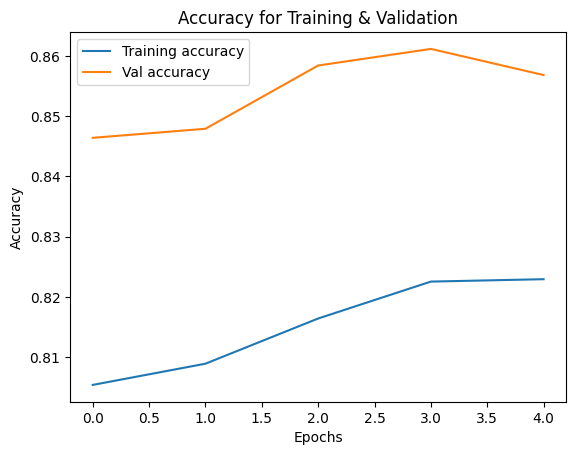

In [44]:
# plot accuracy for training & validation
plt.plot(model_history.history['accuracy'] , label = 'Training accuracy')
plt.plot(model_history.history['val_accuracy'] , label = 'Val accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Training & Validation')
plt.show()

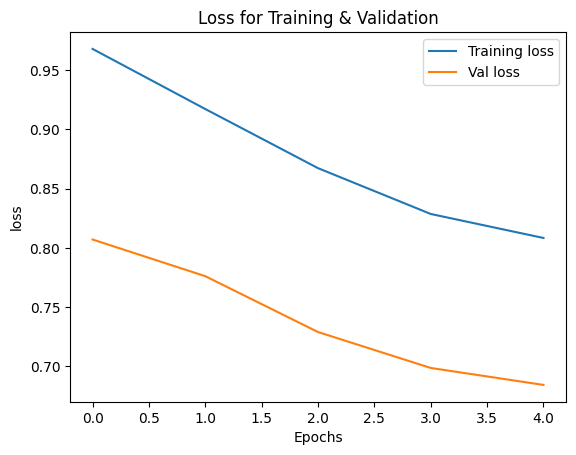

In [45]:
# plot accuracy for training & validation
plt.plot(model_history.history['loss'] , label = 'Training loss')
plt.plot(model_history.history['val_loss'] , label = 'Val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss for Training & Validation')
plt.show()

In [48]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[817   0  12  64   7   1  81   0  18   0]
 [  1 940   8  42   5   0   2   0   2   0]
 [ 15   0 733  16 180   0  51   0   5   0]
 [ 23   3  11 874  55   0  28   0   6   0]
 [  0   0  89  27 835   0  42   0   7   0]
 [  1   0   0   1   0 937   0  32   2  27]
 [156   0 114  49 153   0 500   0  28   0]
 [  0   0   0   0   0  33   0 914   0  53]
 [  0   0   4   5   6   4   8   5 967   1]
 [  0   0   0   0   0   7   0  31   1 961]]


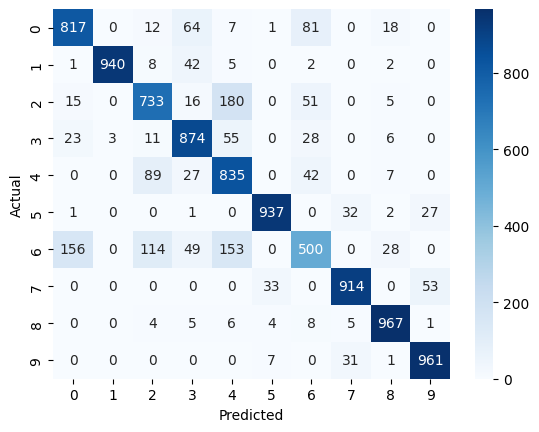

In [50]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Q7

##   In  Q3

- I created a "compile_fun" function
  
      * that takes the model from the user
      * and specifies the optimizer type,
      * learning_rate,
      * and momentum percentage.
- Depending on the optimizer type, we input its parameters,
- and then I execute the compile function on the model.



## In Q4
- I created a class called "MyHyperModel" with two functions:
1. "build"
2. "fit"
   
- The "build" function controls
  
      *  number the layer design
      *  activation function type,
      *  and parameters for the layer creation process.
      *  It also controls the optimizer type
      *  and executes the compile function,
      *  returning the model at the end.

- The "fit" function performs the data training operation.

- Next, we create an object from the class.

      * We use Hyperband, which is a type of algorithm            used to find the best parameter.

  

- Then, we execute a search function on my model, "random_tuner," and it returns the best parameter for the model.

- After that, we take the best parameter in "best_random_params."

- And we get the best model that has been trained.

## In  Q5

- I manually created a model using the best parameters I could find and added two types of layers:
1. Dropout
2. Batch Normalization
   
- I also added parameters "l1, l2"

- Then I created a compile function on the model I created

- And then I performed the fit step